<a href="https://colab.research.google.com/github/Emmanueladewuyi/Hackbio-Bio-coding-Internship-/blob/main/stage2_4BCHtask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data source for sift dataset
import pandas as pd
sift_dataset = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/sift.tsv"
sift_df = pd.read_csv(sift_dataset, sep="\s+")
print(sift_df)


# creating a new column titled specific_protein_aa in sift to concatenate protein and amino acid column

sift_df["specific_protein_aa"] = sift_df["Protein"] + "_" + sift_df["Amino_Acid"]
print(sift_df)


       Protein Amino_Acid  sift_Score
0       A5A607       K60Q    0.197799
1       A5A607       Y56C    0.174970
2       A5A607       Y56S    0.415581
3       A5A630       A16V    0.516738
4       A5A630       A47T    0.387271
...        ...        ...         ...
155462  Q93K97      S190P    0.017680
155463  Q93K97      T124I    0.169846
155464  Q93K97       T23I    0.094208
155465  Q93K97      V145L    1.000000
155466  Q93K97       V49I    0.740893

[155467 rows x 3 columns]
       Protein Amino_Acid  sift_Score specific_protein_aa
0       A5A607       K60Q    0.197799         A5A607_K60Q
1       A5A607       Y56C    0.174970         A5A607_Y56C
2       A5A607       Y56S    0.415581         A5A607_Y56S
3       A5A630       A16V    0.516738         A5A630_A16V
4       A5A630       A47T    0.387271         A5A630_A47T
...        ...        ...         ...                 ...
155462  Q93K97      S190P    0.017680        Q93K97_S190P
155463  Q93K97      T124I    0.169846        Q93K97_T

In [ ]:


# data source for FOLDX dataset
foldx_dataset = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/foldX.tsv"
foldx_df = pd.read_csv(foldx_dataset, sep="\s+")
print(foldx_df)

# creating a new column titled specific_protein_aa in foldx to concatenate protein and amino acid column

foldx_df["specific_protein_aa"] = foldx_df["Protein"] + "_" + foldx_df["Amino_Acid"]
print(foldx_df)


      Protein Amino_Acid  foldX_Score
0      A5A607       E63D     1.842160
1      A5A607       K60Q     0.517100
2      A5A607       Y56C     0.728700
3      A5A607       Y56S     0.842120
4      P00350      A117S    -0.098540
...       ...        ...          ...
76570  Q93K97      S190P    -1.778610
76571  Q93K97      T124I    -0.973832
76572  Q93K97       T23I    -0.242378
76573  Q93K97      V145L    -0.249012
76574  Q93K97       V49I    -0.381140

[76575 rows x 3 columns]
      Protein Amino_Acid  foldX_Score specific_protein_aa
0      A5A607       E63D     1.842160         A5A607_E63D
1      A5A607       K60Q     0.517100         A5A607_K60Q
2      A5A607       Y56C     0.728700         A5A607_Y56C
3      A5A607       Y56S     0.842120         A5A607_Y56S
4      P00350      A117S    -0.098540        P00350_A117S
...       ...        ...          ...                 ...
76570  Q93K97      S190P    -1.778610        Q93K97_S190P
76571  Q93K97      T124I    -0.973832        Q93K97_T1

In [ ]:
# merge the two dataframes on the specific_protein_aa column
final_df = pd.merge(sift_df, foldx_df, on=["specific_protein_aa"])

# print the final dataframe
print(final_df)

      Protein_x Amino_Acid_x  sift_Score specific_protein_aa Protein_y  \
0        A5A607         K60Q    0.197799         A5A607_K60Q    A5A607   
1        A5A607         Y56C    0.174970         A5A607_Y56C    A5A607   
2        A5A607         Y56S    0.415581         A5A607_Y56S    A5A607   
3        P00350        A117S    0.401519        P00350_A117S    P00350   
4        P00350        A117T    0.282769        P00350_A117T    P00350   
...         ...          ...         ...                 ...       ...   
75332    Q93K97        S190P    0.017680        Q93K97_S190P    Q93K97   
75333    Q93K97        T124I    0.169846        Q93K97_T124I    Q93K97   
75334    Q93K97         T23I    0.094208         Q93K97_T23I    Q93K97   
75335    Q93K97        V145L    1.000000        Q93K97_V145L    Q93K97   
75336    Q93K97         V49I    0.740893         Q93K97_V49I    Q93K97   

      Amino_Acid_y  foldX_Score  
0             K60Q     0.517100  
1             Y56C     0.728700  
2        

In [ ]:
# filter the dataframe to find mutations with sift_Score below 0.05 and foldx_score above 2
deleterious_mutation = final_df[(final_df["sift_Score"] < 0.05) & (final_df["foldX_Score"] > 2)]

# print the filtered dataframe
print(deleterious_mutation)

      Protein_x Amino_Acid_x  sift_Score specific_protein_aa Protein_y  \
82       P00350         G48C    0.031864         P00350_G48C    P00350   
100      P00350        L115F    0.028872        P00350_L115F    P00350   
102      P00350        L204F    0.009560        P00350_L204F    P00350   
103      P00350        L208R    0.027592        P00350_L208R    P00350   
209      P00363        I150F    0.048688        P00363_I150F    P00363   
...         ...          ...         ...                 ...       ...   
75267    Q6BEX0        V211F    0.013334        Q6BEX0_V211F    Q6BEX0   
75277    Q6BF16         A97V    0.039486         Q6BF16_A97V    Q6BF16   
75281    Q6BF16         G80S    0.000000         Q6BF16_G80S    Q6BF16   
75311    Q6BF17        G250C    0.028912        Q6BF17_G250C    Q6BF17   
75315    Q6BF17        H298N    0.014758        Q6BF17_H298N    Q6BF17   

      Amino_Acid_y  foldX_Score  
82            G48C      2.25298  
100          L115F      3.12672  
102      

In [ ]:
# find the deleterious amino acid by extracting the first letter of the amino acid from the Amino_Acid column
deleterious_Amino_Acid = deleterious_mutation["Amino_Acid_x"].str[0]

# print the deleterious amino acid
print(deleterious_Amino_Acid)

82       G
100      L
102      L
103      L
209      I
        ..
75267    V
75277    A
75281    G
75311    G
75315    H
Name: Amino_Acid_x, Length: 5261, dtype: object


In [ ]:
# find the deleterious amino acid by extracting the first letter of the amino acid from the Amino_Acid column
deleterious_Amino_Acid = deleterious_mutation["Amino_Acid_y"].str[0]

# print the deleterious amino acid
print(deleterious_Amino_Acid)

82       G
100      L
102      L
103      L
209      I
        ..
75267    V
75277    A
75281    G
75311    G
75315    H
Name: Amino_Acid_y, Length: 5261, dtype: object


In [ ]:
# generate a frequency table to count the occurences of the deleterious amino acid
deleterious_Amino_Acid_freq = deleterious_mutation["Amino_Acid_x"].value_counts()

# print the frequency table
print(deleterious_Amino_Acid_freq)

Amino_Acid_x
G63D     5
A95T     5
G84S     4
G103S    4
P100S    4
        ..
G506S    1
G545C    1
Y518H    1
C128G    1
H298N    1
Name: count, Length: 4555, dtype: int64


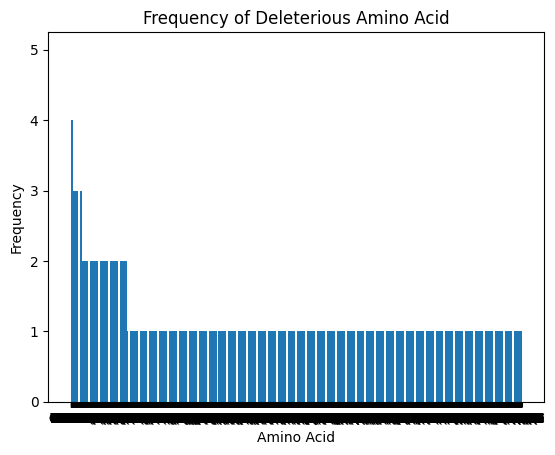

In [ ]:
# generate a barplot and pie chart to represent the frequency of the deleterious amino acids.
import matplotlib.pyplot as plt
# generate a bar plot
plt.bar(deleterious_Amino_Acid_freq.index, deleterious_Amino_Acid_freq.values)
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.title("Frequency of Deleterious Amino Acid")
plt.show()


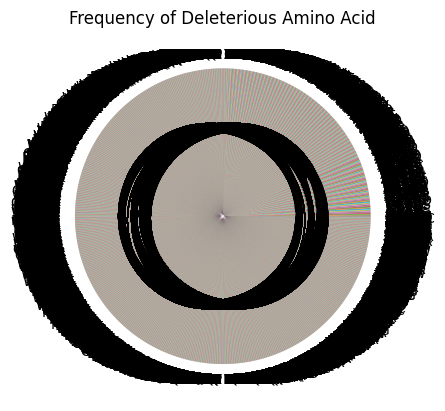

In [ ]:
# generate a pie chart
plt.pie(deleterious_Amino_Acid_freq.values, labels=deleterious_Amino_Acid_freq.index, autopct="%1.1f%%")
plt.title("Frequency of Deleterious Amino Acid")
plt.show()

In [ ]:
# describe the deleterious amino acid with the highest impact on protein structure and function
# the deleterious amino acid with the highest frequency count
top_amino_acid = deleterious_Amino_Acid_freq.idxmax()

# print the deleterious amino acid
print(top_amino_acid)

# the deleterious amino acid "G63D" has the highest impact on protein structure and function.


G63D
